# Linear and ridge regression from scratch

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [2]:
#Reading Data
df_i= pd.read_csv("insurance.csv")

In [3]:
#Displaying first five rows
df_i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Dimension of the dataset
df_i.shape

(1338, 7)

In [5]:
#Displaying datatypes
df_i.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#dataset Stat
df_i.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Checking for null values
df_i.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#Changing object to category
df_i['smoker'] = df_i['smoker'].astype("category")
df_i['region'] = df_i['region'].astype("category")


In [9]:
#ordinal encoding of categorical data

df_i['sex'].replace(['female', 'male'],[1,0],inplace=True)
df_i['smoker'].replace(['yes', 'no'],[0,1],inplace=True)
#df_i['region'].replace(['northeast', 'northwest','southwest','southeast'],[0,1,2,3],inplace=True)
temp = pd.get_dummies(df_i['region'])
df_i = df_i.drop('region',axis = 1)
df_i = df_i.join(temp)
df_i 

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,0,1,0,0
1334,18,1,31.920,0,1,2205.98080,1,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,0,1


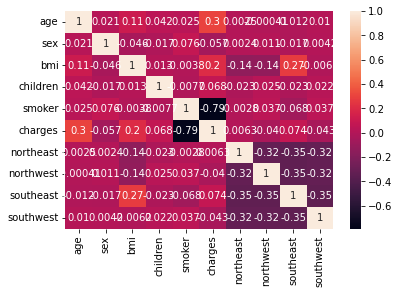

In [10]:
sn.heatmap(df_i.corr(),annot=True)
plt.show()

In [11]:
#Data normilisation
df_i['bmi'] = (df_i['bmi']-df_i['bmi'].min())/(df_i['bmi'].max()-df_i['bmi'].min())
df_i['age'] = (df_i['age']-df_i['age'].min())/(df_i['age'].max()-df_i['age'].min())
df_i['children'] = (df_i['children']-df_i['children'].min())/(df_i['children'].max()-df_i['children'].min())


In [12]:
df_i

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,1,0.321227,0.0,0,16884.92400,0,0,0,1
1,0.000000,0,0.479150,0.2,1,1725.55230,0,0,1,0
2,0.217391,0,0.458434,0.6,1,4449.46200,0,0,1,0
3,0.326087,0,0.181464,0.0,1,21984.47061,0,1,0,0
4,0.304348,0,0.347592,0.0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0,0.403820,0.6,1,10600.54830,0,1,0,0
1334,0.000000,1,0.429379,0.0,1,2205.98080,1,0,0,0
1335,0.000000,1,0.562012,0.0,1,1629.83350,0,0,1,0
1336,0.065217,1,0.264730,0.0,1,2007.94500,0,0,0,1


In [13]:
#Splitting into train and test
np.random.seed(221)
df_i_new= df_i.sample(frac=1)

X=  df_i_new.drop(labels=['charges'],axis = 1)
Y= df_i_new['charges']
indi = range(X.shape[0])
train_num = int(0.8 * X.shape[0])
train_indi = indi[:train_num]
test_indi = indi[train_num:]
X_train, X_test = X.iloc[train_indi], X.iloc[test_indi]
Y_train, Y_test = Y.iloc[train_indi], Y.iloc[test_indi]

print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'Y_train : {Y_train.shape}')
print(f'Y_test:{ Y_test.shape}')

#print(X_train[0:10])
#print(Y_train)

X_train : (1070, 9)
X_test : (268, 9)
Y_train : (1070,)
Y_test:(268,)


In [14]:
X_train=X_train.to_numpy()
X_test.to_numpy()
Y_test=Y_test.tolist()
Y_train=Y_train.tolist()

In [15]:
#Linear Regression

class Linear_Regression():
    
    def __init__(self):
        print ('')   
        
    def fit(self,X,Y):
        #y=np.array(Y)
        w=[]
        #print(y)
        w = np.linalg.inv(np.transpose(X).dot(X))
        w = w.dot(np.transpose(X)).dot(Y)
        return w
    
    def meansquareerror(self,Y,y_pred):
        sum_e=0
        loss = ((Y - y_pred)**2)
        for i in loss:
            sum_e = sum_e+i
        return sum_e/len(Y)
    
    def loss_function(self,Y,y_pred):
        sum_e=0
        loss = ((Y - y_pred)**2)
        for i in loss:
            sum_e = sum_e+i
        return sum_e/2

    def predict(self,x_test,w):
        y_pred = np.dot(x_test,w)
        return y_pred


In [16]:
model = Linear_Regression()
weights = model.fit(X_train,Y_train)

print(f'Weight vector is   {weights}')


Weight vector is   [ 12258.00380327    158.13654934  12240.70795977   2148.1245071
 -24244.31130187  22347.70932632  21843.0740251   20980.19858553
  21406.02999669]


In [17]:
ypred = model.predict(X_test,weights)

linear_mse = model.meansquareerror(Y_test,ypred)

linear_loss = model.loss_function(Y_test,ypred)
print(f' MSE for linear Regression is : {linear_mse}')
print(f' Loss value for linear Regression is :{linear_loss}')

 MSE for linear Regression is : 37397875.71275678
 Loss value for linear Regression is :5011315345.509409


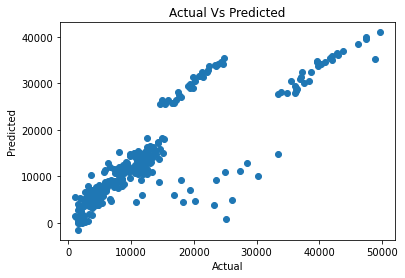

In [18]:
plt.scatter(Y_test,ypred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')
plt.show()

# Ridge regression

In [19]:
class Ridge_Regression():
    
    def __init__(self,X,Y,lambda_value):
        self.X = X
        self.Y = Y
        self.lambda_value=lambda_value
        
    def ridgefit(self):
        
        w1 = np.linalg.inv(np.transpose(X).dot(X)+self.lambda_value*np.identity(self.X.shape[1]))
        w1 = w1.dot(np.transpose(X)).dot(Y)
        return w1
        
    def meansquareerror(self,Y,y_pred):
        sum_e=0
        loss = ((Y - y_pred)**2)
        for i in loss:
            sum_e = sum_e+i
        return sum_e/len(Y)

    def predict(self,x_test,w):
        y_pred = np.dot(x_test,w)
        return y_pred
    
    def loss_function(self,y_c,y_pred_c,w):
        temp = self.lambda_value * np.dot(w.T,w)
        temp_1 = np.dot((y_c-y_pred_c).T,(y_c-y_pred_c))
        return((1/2)*(temp_1+temp))
    
   

In [20]:
rmodel =Ridge_Regression(X_train,Y_train,2)
ridge_weigths= rmodel.ridgefit()
print(f'Weight vector is {ridge_weigths}')

Weight vector is [ 12104.40319312    330.40524582  13590.41833716   2747.36558325
 -23080.14907099  20420.82097678  20039.54515889  19333.31089804
  19399.52760377]


In [21]:
rypred = rmodel.predict(X_test,ridge_weigths)
ridge_mse = rmodel.meansquareerror(Y_test,rypred)
ridge_loss=rmodel.loss_function(Y_test,rypred,ridge_weigths)

print(f' MSE for Ridge Regression is :{ridge_mse}')
print(f' Loss value for Ridge Regression is : {ridge_loss}')

 MSE for Ridge Regression is :36369644.60744127
 Loss value for Ridge Regression is : 7313810772.121571


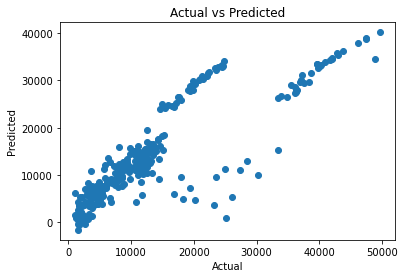

In [22]:
plt.scatter(Y_test,rypred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Bonus

In [23]:
class Ridge_Regression_gradient():
    
    def __init__(self,X,Y,rate,number_iterations,lambda_value):
        self.X = X
        self.Y = Y
        self.rate = rate
        self.number_iterations = number_iterations
        self.lambda_value = lambda_value
        
    def gradient_decent(self,w0):
        w1 = np.dot(self.X.T,(np.dot(self.X,w0))-(self.Y))
        new_w =(w1+self.lambda_value*np.sum(w0))/len(self.Y)
        return new_w
    
    def fit(self):
        w = np.random.uniform(0,1,size =self.X.shape[1]).astype(float)
        
        for i in range(0,self.number_iterations):
            w_new=self.gradient_decent(w)
            w = w - (self.rate * w_new)
        return w
        
    def meansquareerror(self,Y,y_pred):
        sum_e=0
        loss = ((Y - y_pred)**2)
        for i in loss:
            sum_e = sum_e+i
        return sum_e/len(Y)

    def predict(self,x_test,w):
        y_pred = np.dot(x_test,w)
        return y_pred
    
    def loss_function(self,y_c,y_pred_c,w):
        temp = self.lambda_value * np.dot(w.T,w)
        temp_1 = np.dot((y_c-y_pred_c).T,(y_c-y_pred_c))
        return((1/2)*(temp_1+temp))
    

In [24]:
ridge_gradient_model = Ridge_Regression_gradient(X_train,Y_train,1,100000,2)
start_time = time.time()
ridge_gradient_weigths = ridge_gradient_model.fit()
end_time = time.time()
print(f'Time taken to run gradient descent : {end_time - start_time}')
print(f'Weight vector is {ridge_gradient_weigths}')

Time taken to run gradient descent : 6.596345901489258
Weight vector is [ 13463.97947929    687.58431303  15370.67003021   1637.19899666
 -22185.14860671  18227.33625017  17785.36493575  16728.45909205
  17124.51461964]


In [25]:
y_pred_gradient_train = ridge_gradient_model.predict(X_train,ridge_gradient_weigths)
ridge_gradient_mse_train = ridge_gradient_model.meansquareerror(Y_train,y_pred_gradient_train )
ridge_gradient_loss_train=ridge_gradient_model.loss_function(Y_train,y_pred_gradient_train ,ridge_gradient_weigths)
print(f'Train  MSE for Ridge Regression with gradient descent is :{ridge_gradient_mse_train}')
print(f'Train Loss value for Ridge Regression with gradient descent is :{ridge_gradient_loss_train}')

Train  MSE for Ridge Regression with gradient descent is :37898266.11659862
Train Loss value for Ridge Regression with gradient descent is :22410087961.647438


In [26]:
y_pred_gradient = ridge_gradient_model.predict(X_test,ridge_gradient_weigths)
ridge_gradient_mse = ridge_gradient_model .meansquareerror(Y_test,y_pred_gradient )
ridge_gradient_loss=ridge_gradient_model .loss_function(Y_test,y_pred_gradient ,ridge_gradient_weigths)
print(f' MSE for Ridge Regression with gradient descent is :{ridge_gradient_mse}')
print(f' Loss value for Ridge Regression with gradient descent is :{ridge_gradient_loss}')

 MSE for Ridge Regression with gradient descent is :37591138.63423613
 Loss value for Ridge Regression with gradient descent is :7171728166.254821


In [27]:
import time
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridgefit = Ridge(alpha=0.1)
start_time = time.time()
ridgefit.fit(X_train, Y_train)
end_time = time.time()
print(f' Time taken to run in build gradient descent : {end_time - start_time}')


 Time taken to run in build gradient descent : 0.004287004470825195


In [28]:
ridge_pred_y_train = ridgefit.predict(X_train)
mse_inbuilt_train=mean_squared_error(Y_train,ridge_pred_y_train)
print(f' Train MSE of in build gradient descent is {mse_inbuilt_train}')

 Train MSE of in build gradient descent is 36380845.46681989


In [29]:
ridge_pred_y = ridgefit.predict(X_test)
mse_inbuilt=mean_squared_error(Y_test,ridge_pred_y)
print(f'MSE of in build gradient descent is {mse_inbuilt}')

MSE of in build gradient descent is 37387758.56272927
